# Get data

*Выгрузка данных. На вход поступает файл, содержащий информацию о препарате "Витам"*

In [1]:
!gdown 1mt35HH4vFe8wl0E3FyUqLqKljCJgdxCP

Downloading...
From: https://drive.google.com/uc?id=1mt35HH4vFe8wl0E3FyUqLqKljCJgdxCP
To: /content/drug13.csv
100% 662/662 [00:00<00:00, 2.31MB/s]


In [1]:
import pandas as pd
import numpy as np

In [3]:
drug13 = pd.read_csv('2.csv')


In [4]:
drug13

,date,number,price
0,2022-01-10,10.0,122.4
1,2022-01-24,5.0,122.4
2,2022-02-07,3.0,122.4
3,2022-02-14,10.0,122.4
4,2022-02-28,10.0,122.4
5,2022-03-21,15.0,122.4
6,2022-04-11,10.0,122.4
7,2022-05-16,4.0,122.4
8,2022-05-30,10.0,122.4
9,2022-06-22,10.0,122.4


In [5]:
from datetime import datetime
# Преобразуем столбец "date" в объект datetime
drug13['date'] = pd.to_datetime(drug13['date'])

In [6]:
# Преобразуем дату в Unix время и добавляем новый столбец "unix_time"
drug13['unix_time'] = drug13['date'].apply(lambda x: int(x.timestamp()))


## *drug13.csv*

In [7]:
print(drug13)

         date  number  price   unix_time
0  2022-01-10    10.0  122.4  1641772800
1  2022-01-24     5.0  122.4  1642982400
2  2022-02-07     3.0  122.4  1644192000
3  2022-02-14    10.0  122.4  1644796800
4  2022-02-28    10.0  122.4  1646006400
5  2022-03-21    15.0  122.4  1647820800
6  2022-04-11    10.0  122.4  1649635200
7  2022-05-16     4.0  122.4  1652659200
8  2022-05-30    10.0  122.4  1653868800
9  2022-06-22    10.0  122.4  1655856000
10 2022-07-18    10.0  138.0  1658102400
11 2022-07-25    10.0  138.0  1658707200
12 2022-08-22     4.0  138.0  1661126400
13 2022-09-01    10.0  138.0  1661990400
14 2022-09-29    10.0  138.0  1664409600
15 2022-10-12    10.0  138.0  1665532800
16 2022-10-24    10.0  138.0  1666569600
17 2022-10-31    10.0  138.0  1667174400
18 2022-11-28    10.0  138.0  1669593600
19 2022-12-05    10.0  138.0  1670198400
20 2022-12-27    10.0  144.0  1672099200
21 2023-01-18    10.0  144.0  1674000000
22 2023-02-06    10.0  144.0  1675641600
23 2023-02-13   

## Графики

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

### *Объем закупки*

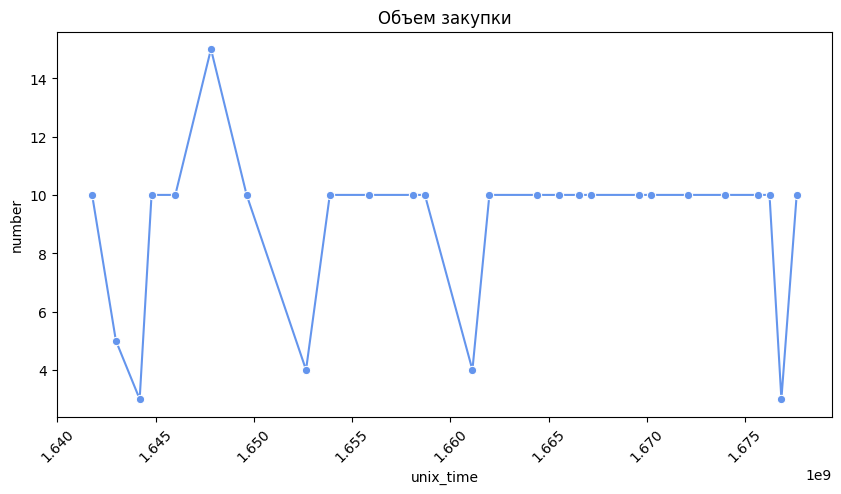

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=drug13['unix_time'], y=drug13['number'], color='cornflowerblue', marker='o')
plt.xticks(rotation=45)
plt.title("Объем закупки")
plt.show()

### *Цена*

перевод во время в сек, в комп время

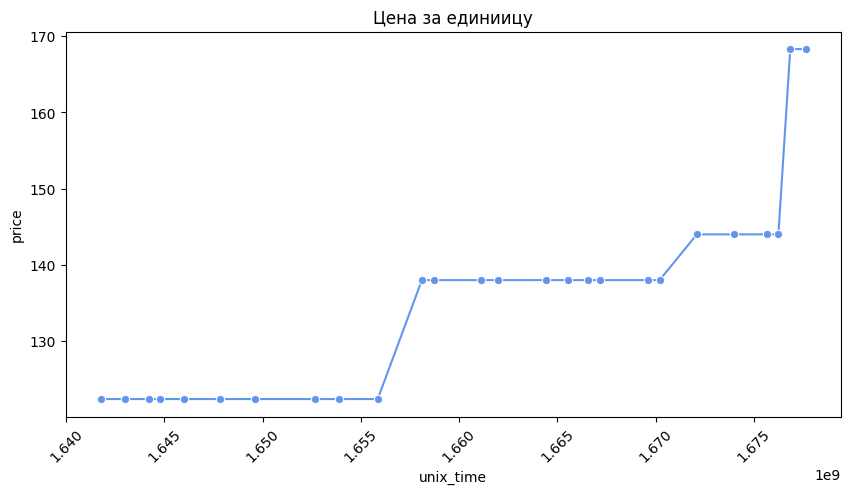

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=drug13['unix_time'], y=drug13['price'], color='cornflowerblue', marker='o')
plt.xticks(rotation=45)
plt.title("Цена за единиицу")
plt.show()

# Интерполяция сплайнами 2 порядка

##Цена

In [11]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# Задаем точки для интерполяции
fx = drug13['unix_time']
fy = drug13['price']

# Создаем объект функции для интерполяции сплайнами 2 порядка
f2 = interp1d(fx, fy, kind='quadratic')

# Создаем массив точек для построения графика
l = len(fx)-1
xnew2 = np.linspace(fx[0], fx[l], num=60, endpoint=True)
ynew2 = f2(xnew2)


In [12]:
df = pd.DataFrame({"unix_time": xnew2, "price": ynew2 })
from datetime import datetime

df['date'] = pd.to_datetime(df['unix_time'],unit='s') # Changing the values of the column

# Удаляем время из столбца 'datetime'
df['date'] = df['date'].dt.date

l1=len(df['price'])
l1

60

### *df*

In [13]:
# Выводим результат
print(df)

       unix_time       price        date
0   1.641773e+09  122.400000  2022-01-10
1   1.642381e+09  122.399999  2022-01-17
2   1.642988e+09  122.400000  2022-01-24
3   1.643596e+09  122.400002  2022-01-31
4   1.644204e+09  122.400000  2022-02-07
5   1.644811e+09  122.400001  2022-02-14
6   1.645419e+09  122.400071  2022-02-21
7   1.646027e+09  122.399992  2022-02-28
8   1.646635e+09  122.399558  2022-03-07
9   1.647242e+09  122.399074  2022-03-14
10  1.647850e+09  122.400088  2022-03-21
11  1.648458e+09  122.402819  2022-03-28
12  1.649066e+09  122.405467  2022-04-04
13  1.649673e+09  122.399323  2022-04-11
14  1.650281e+09  122.383234  2022-04-18
15  1.650889e+09  122.357199  2022-04-25
16  1.651496e+09  122.330575  2022-05-02
17  1.652104e+09  122.345534  2022-05-09
18  1.652712e+09  122.407199  2022-05-16
19  1.653320e+09  122.513424  2022-05-23
20  1.653927e+09  122.365465  2022-05-30
21  1.654535e+09  121.751952  2022-06-06
22  1.655143e+09  120.958632  2022-06-13
23  1.655751e+09

## Объем закупки

In [14]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
# Задаем точки для интерполяции
jx = drug13['unix_time']
jy = drug13['number']

# Создаем объект функции для интерполяции сплайнами 2 порядка
j2 = interp1d(jx, jy, kind='quadratic')

# Выполняем интерполяцию сплайнами 2 порядка для точки x=3
# Создаем массив точек для построения графика
lj = len(jx)-1
jxnew2 = np.linspace(jx[0], jx[lj], num=60, endpoint=True)
jynew2 = j2(jxnew2)


In [15]:
dfn = pd.DataFrame({"unix_time": jxnew2, "number": jynew2 })
from datetime import datetime

dfn['date'] = pd.to_datetime(dfn['unix_time'],unit='s') # Changing the values of the column

# Удаляем время из столбца 'datetime'
dfn['date'] = dfn['date'].dt.date


### *ndf*

In [16]:
# Выводим результат
print(dfn)

       unix_time     number        date
0   1.641773e+09  10.000000  2022-01-10
1   1.642381e+09   7.632314  2022-01-17
2   1.642988e+09   4.972976  2022-01-24
3   1.643596e+09   2.022862  2022-01-31
4   1.644204e+09   3.097277  2022-02-07
5   1.644811e+09  10.122351  2022-02-14
6   1.645419e+09  11.264555  2022-02-21
7   1.646027e+09   9.994644  2022-02-28
8   1.646635e+09  11.024612  2022-03-07
9   1.647242e+09  13.742464  2022-03-14
10  1.647850e+09  15.018307  2022-03-21
11  1.648458e+09  14.411479  2022-03-28
12  1.649066e+09  12.215608  2022-04-04
13  1.649673e+09   9.852570  2022-04-11
14  1.650281e+09   7.510491  2022-04-18
15  1.650889e+09   5.189371  2022-04-25
16  1.651496e+09   3.180179  2022-05-02
17  1.652104e+09   2.794549  2022-05-09
18  1.652712e+09   4.191833  2022-05-16
19  1.653320e+09   7.356970  2022-05-23
20  1.653927e+09  10.194700  2022-05-30
21  1.654535e+09  11.222538  2022-06-06
22  1.655143e+09  10.662367  2022-06-13
23  1.655751e+09  10.074143  2022-06-20


## Графики

### Цена

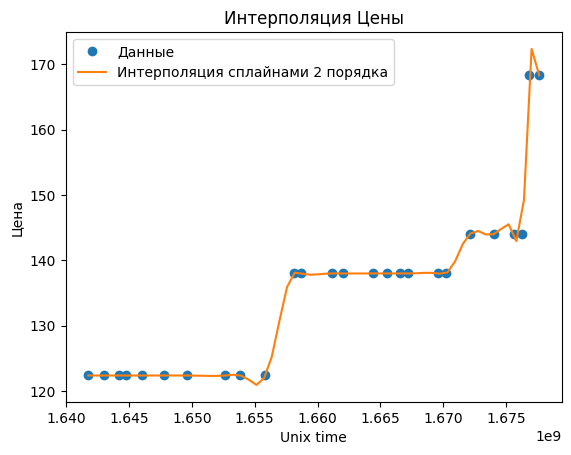

In [17]:
# Строим график интерполяции сплайнами 2 порядка
plt.plot(fx, fy, 'o', xnew2, ynew2, '-')
plt.legend(['Данные', 'Интерполяция сплайнами 2 порядка'], loc='best')
plt.title('Интерполяция Цены')
plt.xlabel('Unix time')
plt.ylabel('Цена')
plt.show()

### Объем закупки

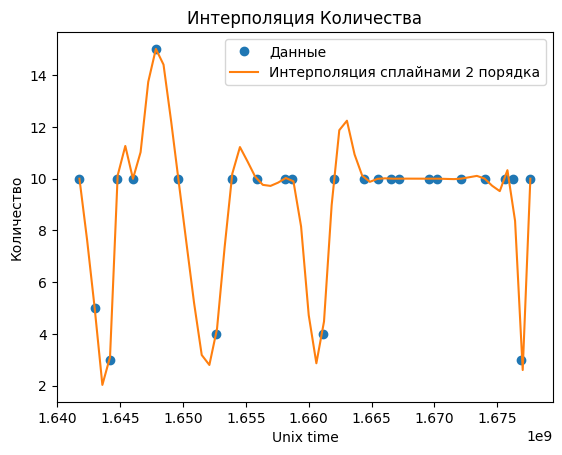

In [18]:
# Строим график интерполяции сплайнами 2 порядка
plt.plot(jx, jy, 'o', jxnew2, jynew2, '-')
plt.legend(['Данные', 'Интерполяция сплайнами 2 порядка'], loc='best')
plt.title('Интерполяция Количества')
plt.xlabel('Unix time')
plt.ylabel('Количество')
plt.show()

## Разделение на тренировочную и тестовую выборку



In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd

X=df['unix_time'].values
y=df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X1= X_train.reshape(-1, 1)
y1 = y_train.reshape(-1, 1)
X2 = X_test.reshape(-1, 1)
y2 = y_test.reshape(-1, 1)

W=dfn['unix_time'].values
z=dfn['number'].values

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.2, random_state=42)
W1= W_train.reshape(-1, 1)
z1 = z_train.reshape(-1, 1)
W2 = W_test.reshape(-1, 1)
z2 = z_test.reshape(-1, 1)


#D Number

In [80]:
dfn['delta number'] = dfn['number'].diff(periods=-1)
dfn['delta number'] = dfn['delta number']. fillna (0)
print(dfn)

       unix_time     number        date  delta number
0   1.641773e+09  10.000000  2022-01-10      0.156813
1   1.642381e+09   9.843187  2022-01-17      0.051595
2   1.642988e+09   9.791592  2022-01-24     -0.053623
3   1.643596e+09   9.845215  2022-01-31     -0.158841
4   1.644204e+09  10.004057  2022-02-07     -0.264060
5   1.644811e+09  10.268116  2022-02-14     -0.233163
6   1.645419e+09  10.501280  2022-02-21      0.533570
7   1.646027e+09   9.967709  2022-02-28      1.410389
8   1.646635e+09   8.557321  2022-03-07      2.284501
9   1.647242e+09   6.272820  2022-03-14      1.600778
10  1.647850e+09   4.672042  2022-03-21     -0.399332
11  1.648458e+09   5.071374  2022-03-28     -2.399442
12  1.649066e+09   7.470816  2022-04-04     -4.393612
13  1.649673e+09  11.864428  2022-04-11     -4.696594
14  1.650281e+09  16.561023  2022-04-18     -3.669838
15  1.650889e+09  20.230861  2022-04-25     -2.643081
16  1.651496e+09  22.873942  2022-05-02     -1.616325
17  1.652104e+09  24.490266 

In [81]:
from sklearn.model_selection import train_test_split
import pandas as pd

C=dfn['unix_time'].values
d=dfn['delta number'].values

C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=42)
C1= C_train.reshape(-1, 1)
d1 = d_train.reshape(-1, 1)
C2 = C_test.reshape(-1, 1)
d2 = d_test.reshape(-1, 1)

##KNN

###best k

In [84]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
# Calculate the minimum number of samples
min_sam = int(np.floor(dfn.shape[0] * 0.5))
min_sam

30

In [86]:
error4 = []


# Calculating MAE error for K values between 1 and 39
for i in range(1, min_sam):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(C1, d1)
    pred_i4 = knn.predict(C2)
    mae = mean_absolute_error(d2, pred_i4)
    error4.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

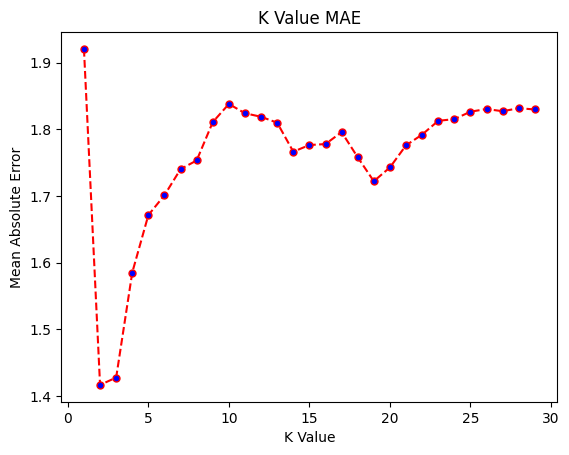

In [87]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, min_sam), error4, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [88]:
print(min(error4))
bna2 = np.array(error4).argmin()
print(bna2)
bnac2= bna2+1
print('best neighbour:', bnac2 )

1.4167258877893787
1
best neighbour: 2


###code

In [90]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel2 = KNeighborsRegressor(n_neighbors=bnac2)

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on X_train
scaler.fit(C1)
# Scale both X_train and X_test
C_train = scaler.transform(C1)
C_test = scaler.transform(C2)

In [92]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=bnac2)

regressor.fit(C1, d1)

KNeighborsRegressor(n_neighbors=2)

In [93]:
knn_pred_ac2 = regressor.predict(C2)

###Метрики

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(d2, knn_pred_ac2)
mse = mean_squared_error(d2, knn_pred_ac2)
rmse = mean_squared_error(d2, knn_pred_ac2, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 1.4167258877893787
mse: 7.494502231481775
rmse: 2.737608852900972


In [95]:
regressor.score(X1, y1)

-134.35467639988877

In [96]:
mse = mean_squared_error(d2, knn_pred_ac2)
print('Accuracy',100- (np.mean(np.abs((d2 - knn_pred_ac2) / d2)) * 100))
mae = mean_absolute_error(d2, knn_pred_ac2)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(mae)

Accuracy 16.297165459230982
RMSE: 2.74
1.4167258877893787


###График

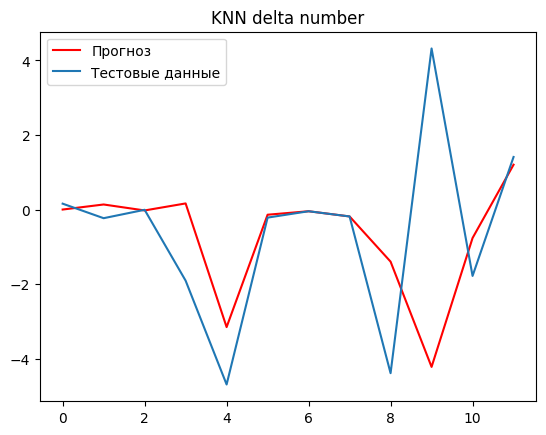

Прогноз:
[[-1.01415119e-03]
 [ 1.34755339e-01]
 [-2.54353275e-02]
 [ 1.63039687e-01]
 [-3.15645945e+00]
 [-1.39961122e-01]
 [-4.67070986e-02]
 [-1.86476497e-01]
 [-1.39938716e+00]
 [-4.22488763e+00]
 [-7.65348222e-01]
 [ 1.20220947e+00]]
Тест:
[[ 0.15681313]
 [-0.23316334]
 [-0.00767795]
 [-1.90972905]
 [-4.69659437]
 [-0.21763109]
 [-0.0467071 ]
 [-0.1864765 ]
 [-4.3936122 ]
 [ 4.32234642]
 [-1.78284265]
 [ 1.40988965]]


In [97]:
from matplotlib import pyplot
pyplot.plot(knn_pred_ac2,color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")

o1 = [0.0,0]
o2 = [0.0,10]

plt.title("KNN delta number")

plt.legend()
plt.show()
print("Прогноз:", knn_pred_ac2, sep ="\n")
print("Тест:", d2, sep ="\n")

###D pred

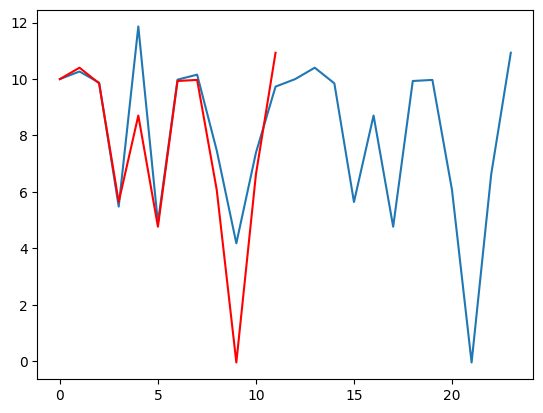

[[ 9.99898585]
 [10.40287156]
 [ 9.84820564]
 [ 5.64262106]
 [ 8.70796899]
 [ 4.76689089]
 [ 9.93196764]
 [ 9.97033615]
 [ 6.07142908]
 [-0.0470376 ]
 [ 6.6239622 ]
 [10.93379203]]
[[10.        ]
 [10.26811622]
 [ 9.87364097]
 [ 5.47958137]
 [11.86442844]
 [ 4.90685202]
 [ 9.97867474]
 [10.15681265]
 [ 7.47081625]
 [ 4.17785003]
 [ 7.38931043]
 [ 9.73158257]]


In [98]:
import numpy as np
import matplotlib.pyplot as plt

arr_sum = np.sum([knn_pred_ac2, z2], axis=0)
y = np.concatenate((z2, arr_sum))

# выводим массив на график
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(arr_sum, color = 'red')

plt.show()




#pyplot.plot(z2, label="Тестовые данные")

#plt.show()
print(arr_sum)
print(z2)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(z2, arr_sum)
mse = mean_squared_error(z2, arr_sum)
rmse = mean_squared_error(z2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.9538067625472259
mse: 2.6586828942322174
rmse: 1.6305468083536325


In [100]:
from sklearn.metrics import r2_score

# y_true - истинные значения
# y_pred - предсказанные значения
r2_score(z2, arr_sum)

0.5308011516713369

## SVM Reg


##SVM RBF


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR



In [102]:
#Создание модели
svr = SVR(kernel='rbf')
#Обучение модели
svr.fit(C1, d1)
#Прогноз
rbf_preds = svr.predict(C2)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
rbf_preds

array([-0.03749054, -0.04708862, -0.00112387,  0.37310643,  0.29250894,
        0.41337274,  0.07125099,  0.49317641,  0.22883548,  0.23626483,
        0.42224943,  0.51707871])

### Метрики

In [104]:
#Оценка точности

from sklearn import metrics
print('R2 Value:',metrics.r2_score(d2, rbf_preds))

print('Accuracy',100- (np.mean(np.abs((d2 - rbf_preds) / d2)) * 100))

R2 Value: -0.16418743859066165
Accuracy -357.13263573486466


### График

Прогноз:
[-0.03749054 -0.04708862 -0.00112387  0.37310643  0.29250894  0.41337274
  0.07125099  0.49317641  0.22883548  0.23626483  0.42224943  0.51707871]
Тест:
[[ 0.15681313]
 [-0.23316334]
 [-0.00767795]
 [-1.90972905]
 [-4.69659437]
 [-0.21763109]
 [-0.0467071 ]
 [-0.1864765 ]
 [-4.3936122 ]
 [ 4.32234642]
 [-1.78284265]
 [ 1.40988965]]


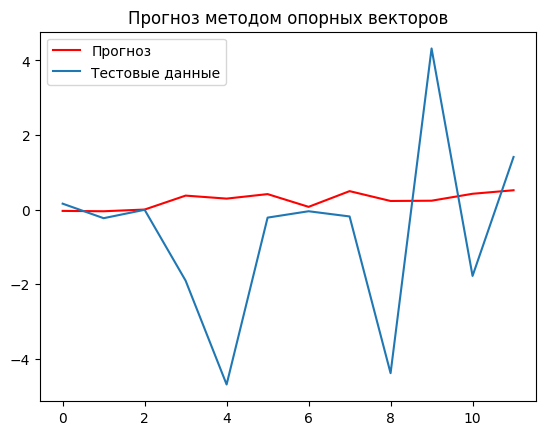

In [105]:
from matplotlib import pyplot
pyplot.plot(rbf_preds, color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")
print ("Прогноз:", rbf_preds, sep = '\n')
print("Тест:", d2, sep = '\n')
plt.title("Прогноз методом опорных векторов")
plt.legend()
plt.show()

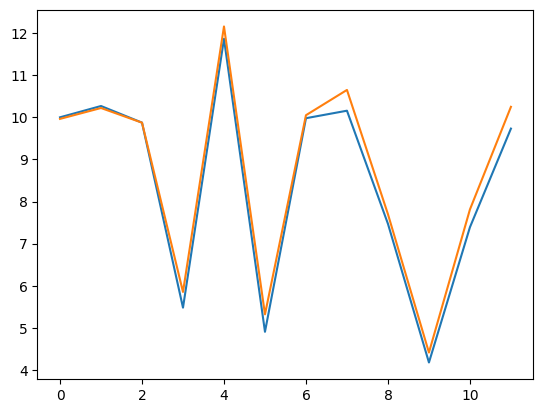

[[ 9.96250946]
 [10.2210276 ]
 [ 9.87251709]
 [ 5.8526878 ]
 [12.15693739]
 [ 5.32022476]
 [10.04992573]
 [10.64998906]
 [ 7.69965172]
 [ 4.41411486]
 [ 7.81155986]
 [10.24866128]]
[[10.        ]
 [10.26811622]
 [ 9.87364097]
 [ 5.47958137]
 [11.86442844]
 [ 4.90685202]
 [ 9.97867474]
 [10.15681265]
 [ 7.47081625]
 [ 4.17785003]
 [ 7.38931043]
 [ 9.73158257]]


In [106]:
import numpy as np
import matplotlib.pyplot as plt

rr=rbf_preds.reshape(-1, 1)
arr_sum = np.sum([rr, z2], axis=0)
pyplot.plot(z2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(z2)

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(z2, arr_sum)
mse = mean_squared_error(z2, arr_sum)
rmse = mean_squared_error(z2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.2611289167007302
mse: 0.10011853769426811
rmse: 0.3164151350587833


In [108]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(z2, arr_sum)
mse = mean_squared_error(z2, arr_sum)
rmse = mean_squared_error(z2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(z2, arr_sum)

mae: 0.2611289167007302
mse: 0.10011853769426811
rmse: 0.3164151350587833


0.9823312879153773

##Decision tree

In [116]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [117]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(C1, d1)

DecisionTreeRegressor(random_state=0)

###Метрики

In [118]:
y_pred_tree = dt_regressor.predict(C2)
acc = r2_score(d2, y_pred_tree)
print ('Accuracy', acc )

Accuracy 0.7505497104661875


###График



In [119]:
y_pred_tree

array([ 0.05159494, -0.26405961,  0.10828792, -0.54603687, -3.66983775,
       -0.74808806, -0.13686715, -0.98465957, -2.3994423 ,  1.69472114,
       -0.98465957,  0.61170658])

Прогноз:
[ 0.05159494 -0.26405961  0.10828792 -0.54603687 -3.66983775 -0.74808806
 -0.13686715 -0.98465957 -2.3994423   1.69472114 -0.98465957  0.61170658]
Тест:
[[ 0.15681313]
 [-0.23316334]
 [-0.00767795]
 [-1.90972905]
 [-4.69659437]
 [-0.21763109]
 [-0.0467071 ]
 [-0.1864765 ]
 [-4.3936122 ]
 [ 4.32234642]
 [-1.78284265]
 [ 1.40988965]]


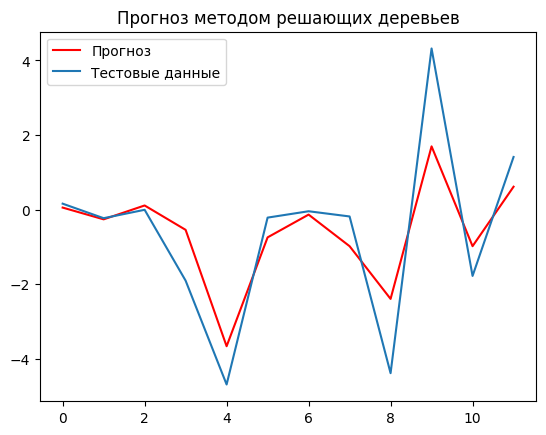

In [120]:
from matplotlib import pyplot
pyplot.plot(y_pred_tree, color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")
print ("Прогноз:", y_pred_tree, sep = '\n')
print("Тест:", d2, sep = '\n')
plt.title("Прогноз методом решающих деревьев")
plt.legend()
plt.show()

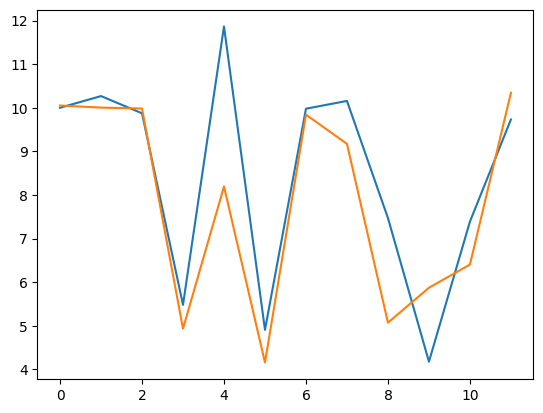

[[10.05159494]
 [10.0040566 ]
 [ 9.98192888]
 [ 4.9335445 ]
 [ 8.19459069]
 [ 4.15876395]
 [ 9.84180759]
 [ 9.17215307]
 [ 5.07137395]
 [ 5.87257116]
 [ 6.40465085]
 [10.34328914]]
[[10.        ]
 [10.26811622]
 [ 9.87364097]
 [ 5.47958137]
 [11.86442844]
 [ 4.90685202]
 [ 9.97867474]
 [10.15681265]
 [ 7.47081625]
 [ 4.17785003]
 [ 7.38931043]
 [ 9.73158257]]


In [121]:
import numpy as np
import matplotlib.pyplot as plt

pt= y_pred_tree.reshape(-1, 1)
arr_sum = np.sum([pt, z2], axis=0)
pyplot.plot(z2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(z2)

In [122]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(z2, arr_sum)
mse = mean_squared_error(z2, arr_sum)
rmse = mean_squared_error(z2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(z2, arr_sum)

mae: 1.016663456035989
mse: 2.114253876887791
rmse: 1.4540474121870273


0.6268808565842009

##GrB

In [131]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [132]:
xgbr = xgb.XGBRegressor()
xgbr.fit(C1, d1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

###Метрики

In [133]:
z_grb = xgbr.predict(C2)

In [134]:
print('Accuracy',100- (np.mean(np.abs((d2 - z_grb) / d2)) * 100))

Accuracy -2515.647519491907


###График

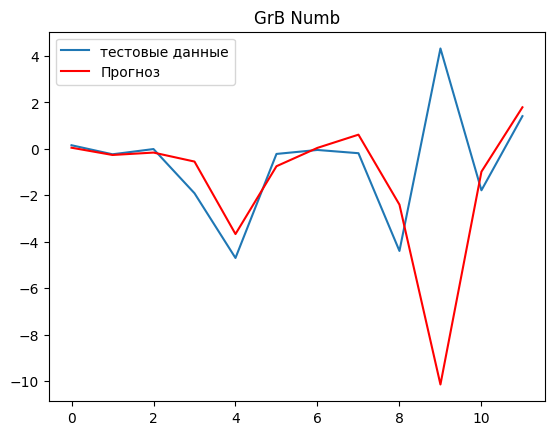

In [135]:
x_ax = range(len(z2))
plt.plot( x_ax,d2, label="тестовые данные")
plt.plot( x_ax, z_grb, color = 'red', label="Прогноз")
plt.title("GrB Numb")

plt.legend()
plt.show()

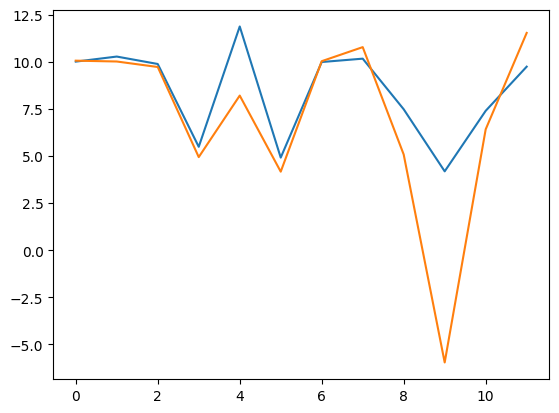

[[10.05033068]
 [10.00582711]
 [ 9.71428209]
 [ 4.93347635]
 [ 8.19757978]
 [ 4.16024853]
 [10.02243641]
 [10.76849315]
 [ 5.07037102]
 [-5.96487496]
 [ 6.4070229 ]
 [11.52209787]]
[[10.        ]
 [10.26811622]
 [ 9.87364097]
 [ 5.47958137]
 [11.86442844]
 [ 4.90685202]
 [ 9.97867474]
 [10.15681265]
 [ 7.47081625]
 [ 4.17785003]
 [ 7.38931043]
 [ 9.73158257]]


In [136]:
import numpy as np
import matplotlib.pyplot as plt

z_grbs= z_grb.reshape(-1, 1)
arr_sum = np.sum([z_grbs, z2], axis=0)
pyplot.plot(z2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(z2)

In [137]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(z2, arr_sum)
mse = mean_squared_error(z2, arr_sum)
rmse = mean_squared_error(z2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(z2, arr_sum)

mae: 1.7835792551438014
mse: 10.631838336474173
rmse: 3.260649986808485


-0.8762848002340611

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
z_grb = xgbr.predict(C2)
mse = mean_squared_error(d2, z_grb)
print('Accuracy',100- (np.mean(np.abs((d2 - z_grb) / d2)) * 100))
mae = mean_absolute_error(d2, z_grb)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(mae)

Accuracy -2515.647519491907
RMSE: 4.26
1.8114730178883238


#D Price

In [21]:
df['delta price'] = df['price'].diff(periods=-1)
df['delta price'] = df['delta price']. fillna (0)
print(df)

       unix_time       price        date   delta price
0   1.641773e+09  122.400000  2022-01-10  6.466981e-07
1   1.642381e+09  122.399999  2022-01-17 -6.592859e-07
2   1.642988e+09  122.400000  2022-01-24 -1.964178e-06
3   1.643596e+09  122.400002  2022-01-31  2.103736e-06
4   1.644204e+09  122.400000  2022-02-07 -8.390904e-07
5   1.644811e+09  122.400001  2022-02-14 -7.016407e-05
6   1.645419e+09  122.400071  2022-02-21  7.932043e-05
7   1.646027e+09  122.399992  2022-02-28  4.332421e-04
8   1.646635e+09  122.399558  2022-03-07  4.842180e-04
9   1.647242e+09  122.399074  2022-03-14 -1.014147e-03
10  1.647850e+09  122.400088  2022-03-21 -2.730645e-03
11  1.648458e+09  122.402819  2022-03-28 -2.648386e-03
12  1.649066e+09  122.405467  2022-04-04  6.144228e-03
13  1.649673e+09  122.399323  2022-04-11  1.608930e-02
14  1.650281e+09  122.383234  2022-04-18  2.603436e-02
15  1.650889e+09  122.357199  2022-04-25  2.662404e-02
16  1.651496e+09  122.330575  2022-05-02 -1.495879e-02
17  1.6521

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd

C=df['unix_time'].values
d=df['delta price'].values

C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=42)
C1= C_train.reshape(-1, 1)
d1 = d_train.reshape(-1, 1)
C2 = C_test.reshape(-1, 1)
d2 = d_test.reshape(-1, 1)

##KNN

###best k

In [23]:
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
# Calculate the minimum number of samples
min_sam = int(np.floor(dfn.shape[0] * 0.5))
min_sam

30

In [25]:
error4 = []


# Calculating MAE error for K values between 1 and 39
for i in range(1, min_sam):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(C1, d1)
    pred_i4 = knn.predict(C2)
    mae = mean_absolute_error(d2, pred_i4)
    error4.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

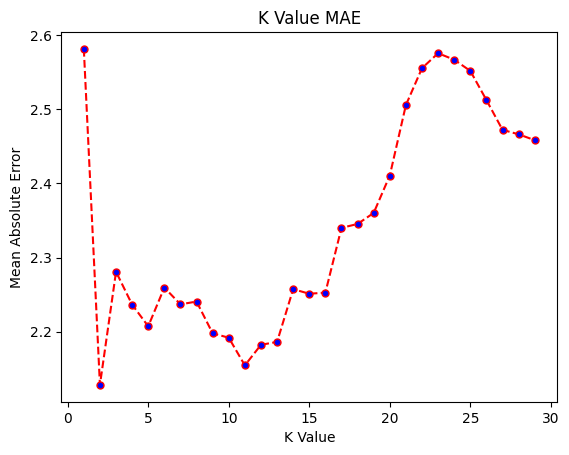

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, min_sam), error4, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [27]:
print(min(error4))
bna2 = np.array(error4).argmin()
print(bna2)
bnac2= bna2+1
print('best neighbour:', bnac2 )

2.128142541699592
1
best neighbour: 2


###code

In [28]:
from sklearn.neighbors import KNeighborsRegressor
KNN_RegModel2 = KNeighborsRegressor(n_neighbors=bnac2)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on X_train
scaler.fit(C1)
# Scale both X_train and X_test
C_train = scaler.transform(C1)
C_test = scaler.transform(C2)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=bnac2)

regressor.fit(C1, d1)

KNeighborsRegressor(n_neighbors=2)

In [31]:
knn_pred_ac2 = regressor.predict(C2)

###Метрики

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(d2, knn_pred_ac2)
mse = mean_squared_error(d2, knn_pred_ac2)
rmse = mean_squared_error(d2, knn_pred_ac2, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 2.128142541699592
mse: 40.589619148875194
rmse: 6.3709982851100495


In [33]:
regressor.score(X1, y1)

-135.52009439756452

In [34]:
mse = mean_squared_error(d2, knn_pred_ac2)
print('Accuracy',100- (np.mean(np.abs((d2 - knn_pred_ac2) / d2)) * 100))
mae = mean_absolute_error(d2, knn_pred_ac2)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(mae)

Accuracy -31.299360176396704
RMSE: 6.37
2.128142541699592


###График

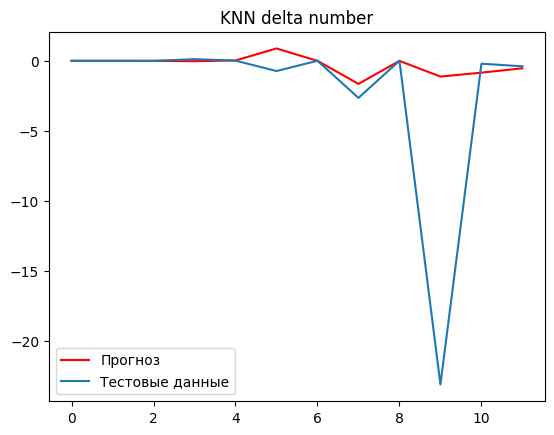

Прогноз:
[[-1.31173193e-06]
 [ 3.92406713e-05]
 [-1.45470652e-03]
 [-2.48329996e-02]
 [ 2.63292030e-02]
 [ 8.82222171e-01]
 [ 1.14159927e-03]
 [-1.64572828e+00]
 [-2.68951575e-03]
 [-1.12317843e+00]
 [-8.43380489e-01]
 [-5.31519758e-01]]
Тест:
[[ 6.46698098e-07]
 [-7.01640691e-05]
 [-1.55703925e-03]
 [ 1.20653316e-01]
 [ 1.60892965e-02]
 [-7.29186615e-01]
 [ 5.62750081e-03]
 [-2.64436357e+00]
 [ 6.14422831e-03]
 [-2.31011669e+01]
 [-2.04529887e-01]
 [-3.89951993e-01]]


In [35]:
from matplotlib import pyplot
pyplot.plot(knn_pred_ac2,color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")

o1 = [0.0,0]
o2 = [0.0,10]

plt.title("KNN delta number")

plt.legend()
plt.show()
print("Прогноз:", knn_pred_ac2, sep ="\n")
print("Тест:", d2, sep ="\n")

###D pred

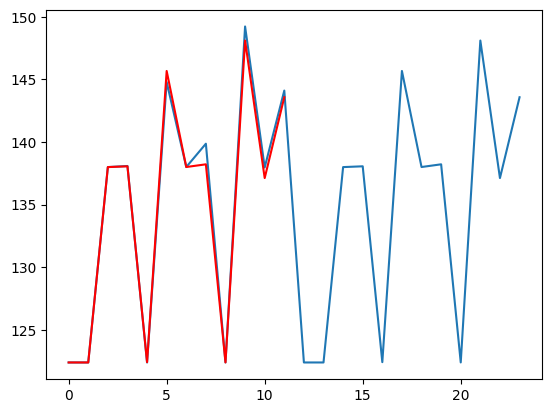

[[122.39999869]
 [122.40003995]
 [137.99678971]
 [138.05944076]
 [122.42565225]
 [145.66953797]
 [138.00313116]
 [138.21818436]
 [122.40277776]
 [148.09877181]
 [137.12023996]
 [143.5724507 ]]
[[10.        ]
 [10.12235107]
 [10.93571836]
 [ 9.99982689]
 [ 9.85256967]
 [ 9.72617042]
 [ 8.97648657]
 [ 9.99061183]
 [12.21560762]
 [ 8.36760337]
 [10.00015959]
 [10.0034226 ]]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

arr_sum = np.sum([knn_pred_ac2, y2], axis=0)
y = np.concatenate((y2, arr_sum))

# выводим массив на график
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(arr_sum, color = 'red')

plt.show()




#pyplot.plot(z2, label="Тестовые данные")

#plt.show()
print(arr_sum)
print(z2)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, arr_sum)
mse = mean_squared_error(y2, arr_sum)
rmse = mean_squared_error(y2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.4235431422045555
mse: 0.47861598170744785
rmse: 0.6918207728215797


In [38]:
from sklearn.metrics import r2_score

# y_true - истинные значения
# y_pred - предсказанные значения
r2_score(y2, arr_sum)

0.9946612851417133

## SVM Reg


##SVM RBF


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR



In [40]:
#Создание модели
svr = SVR(kernel='rbf')
#Обучение модели
svr.fit(C1, d1)
#Прогноз
rbf_preds = svr.predict(C2)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
rbf_preds

array([ 0.04406901,  0.08459987, -0.08396346, -0.12946248,  0.07452974,
       -0.0396253 , -0.09328298, -0.13077433,  0.08464695,  0.04258677,
       -0.13272806, -0.11484124])

### Метрики

In [42]:
#Оценка точности

from sklearn import metrics
print('R2 Value:',metrics.r2_score(d2, rbf_preds))

print('Accuracy',100- (np.mean(np.abs((d2 - rbf_preds) / d2)) * 100))

R2 Value: -0.12808721319215244
Accuracy -1144170.977798156


### График

Прогноз:
[ 0.04406901  0.08459987 -0.08396346 -0.12946248  0.07452974 -0.0396253
 -0.09328298 -0.13077433  0.08464695  0.04258677 -0.13272806 -0.11484124]
Тест:
[[ 6.46698098e-07]
 [-7.01640691e-05]
 [-1.55703925e-03]
 [ 1.20653316e-01]
 [ 1.60892965e-02]
 [-7.29186615e-01]
 [ 5.62750081e-03]
 [-2.64436357e+00]
 [ 6.14422831e-03]
 [-2.31011669e+01]
 [-2.04529887e-01]
 [-3.89951993e-01]]


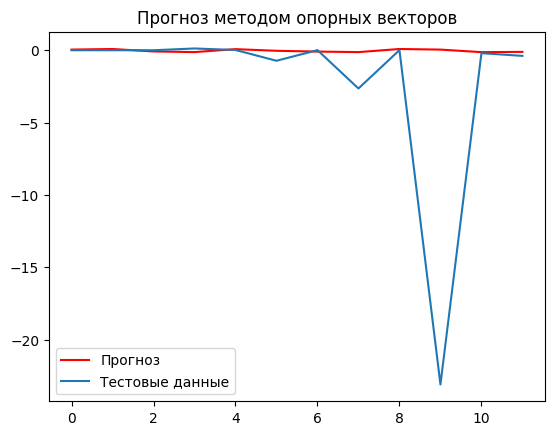

In [43]:
from matplotlib import pyplot
pyplot.plot(rbf_preds, color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")
print ("Прогноз:", rbf_preds, sep = '\n')
print("Тест:", d2, sep = '\n')
plt.title("Прогноз методом опорных векторов")
plt.legend()
plt.show()

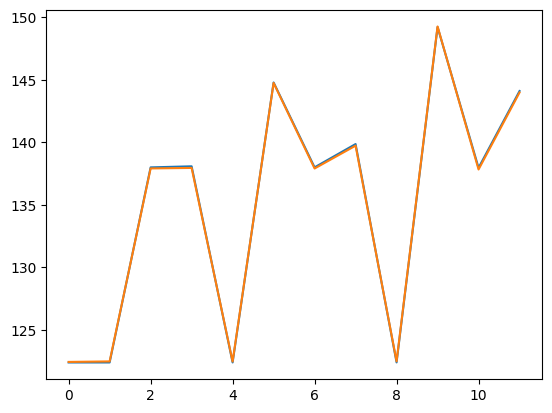

[[122.44406901]
 [122.48460058]
 [137.91428096]
 [137.95481128]
 [122.47385279]
 [144.7476905 ]
 [137.90870658]
 [139.7331383 ]
 [122.49011423]
 [149.26453701]
 [137.83089238]
 [143.98912922]]
[[122.4       ]
 [122.40000071]
 [137.99824442]
 [138.08427376]
 [122.39932305]
 [144.7873158 ]
 [138.00198956]
 [139.86391264]
 [122.40546727]
 [149.22195024]
 [137.96362045]
 [144.10397046]]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

rr=rbf_preds.reshape(-1, 1)
arr_sum = np.sum([rr, y2], axis=0)
pyplot.plot(y2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(y2)

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, arr_sum)
mse = mean_squared_error(y2, arr_sum)
rmse = mean_squared_error(y2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.08792584921828588
mse: 0.008801840502606864
rmse: 0.09381812459544725


In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, arr_sum)
mse = mean_squared_error(y2, arr_sum)
rmse = mean_squared_error(y2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(y2, arr_sum)

mae: 0.08792584921828588
mse: 0.008801840502606864
rmse: 0.09381812459544725


0.9999018200008618

##Decision tree

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

In [48]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(C1, d1)

DecisionTreeRegressor(random_state=0)

###Метрики

In [49]:
y_pred_tree = dt_regressor.predict(C2)
acc = r2_score(d2, y_pred_tree)
print ('Accuracy', acc )

Accuracy 0.37891141234319126


###График



In [50]:
y_pred_tree

array([-6.59285902e-07, -8.39090447e-07, -2.56546563e-03,  9.00132842e-03,
        2.60343646e-02,  2.56402622e+00,  1.60008836e-03, -1.69576231e+00,
       -2.64838627e-03, -6.26947404e+00, -1.69576231e+00, -1.59569425e+00])

Прогноз:
[-6.59285902e-07 -8.39090447e-07 -2.56546563e-03  9.00132842e-03
  2.60343646e-02  2.56402622e+00  1.60008836e-03 -1.69576231e+00
 -2.64838627e-03 -6.26947404e+00 -1.69576231e+00 -1.59569425e+00]
Тест:
[[ 6.46698098e-07]
 [-7.01640691e-05]
 [-1.55703925e-03]
 [ 1.20653316e-01]
 [ 1.60892965e-02]
 [-7.29186615e-01]
 [ 5.62750081e-03]
 [-2.64436357e+00]
 [ 6.14422831e-03]
 [-2.31011669e+01]
 [-2.04529887e-01]
 [-3.89951993e-01]]


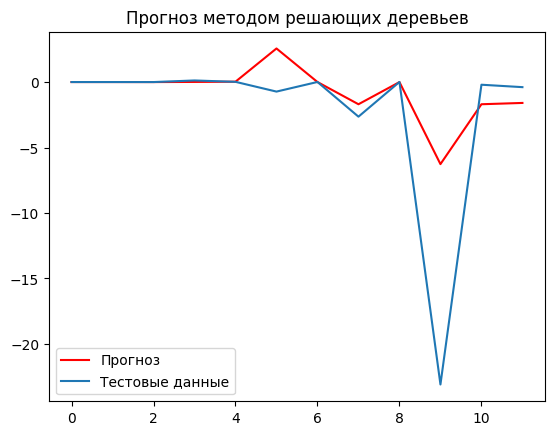

In [51]:
from matplotlib import pyplot
pyplot.plot(y_pred_tree, color='red', label="Прогноз")
pyplot.plot(d2, label="Тестовые данные")
print ("Прогноз:", y_pred_tree, sep = '\n')
print("Тест:", d2, sep = '\n')
plt.title("Прогноз методом решающих деревьев")
plt.legend()
plt.show()

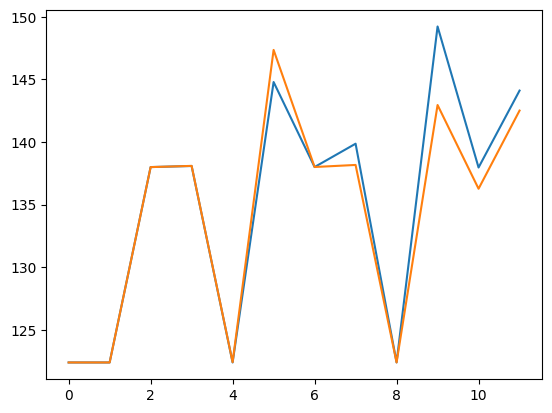

[[122.39999934]
 [122.39999987]
 [137.99567895]
 [138.09327509]
 [122.42535741]
 [147.35134202]
 [138.00358965]
 [138.16815033]
 [122.40281889]
 [142.9524762 ]
 [136.26785814]
 [142.50827621]]
[[10.        ]
 [10.12235107]
 [10.93571836]
 [ 9.99982689]
 [ 9.85256967]
 [ 9.72617042]
 [ 8.97648657]
 [ 9.99061183]
 [12.21560762]
 [ 8.36760337]
 [10.00015959]
 [10.0034226 ]]


In [52]:
import numpy as np
import matplotlib.pyplot as plt

pt= y_pred_tree.reshape(-1, 1)
arr_sum = np.sum([pt, y2], axis=0)
pyplot.plot(y2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(z2)

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, arr_sum)
mse = mean_squared_error(y2, arr_sum)
rmse = mean_squared_error(y2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(y2, arr_sum)

mae: 1.15521418762604
mse: 4.514897491541415
rmse: 2.1248288146439975


0.9496386429977859

##GrB

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [55]:
xgbr = xgb.XGBRegressor()
xgbr.fit(C1, d1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

###Метрики

In [56]:
z_grb = xgbr.predict(C2)

In [57]:
print('Accuracy',100- (np.mean(np.abs((d2 - z_grb) / d2)) * 100))

Accuracy -11318596.066472722


###График

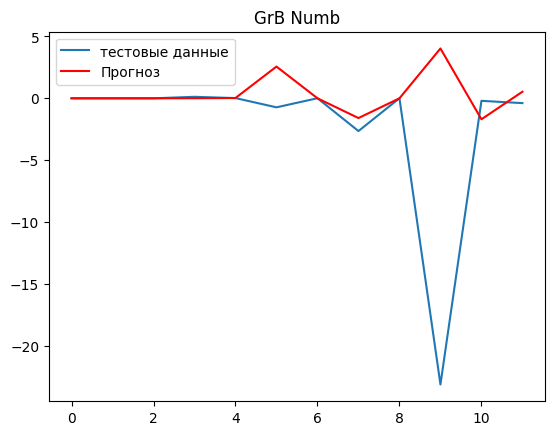

In [58]:
x_ax = range(len(z2))
plt.plot( x_ax,d2, label="тестовые данные")
plt.plot( x_ax, z_grb, color = 'red', label="Прогноз")
plt.title("GrB Numb")

plt.legend()
plt.show()

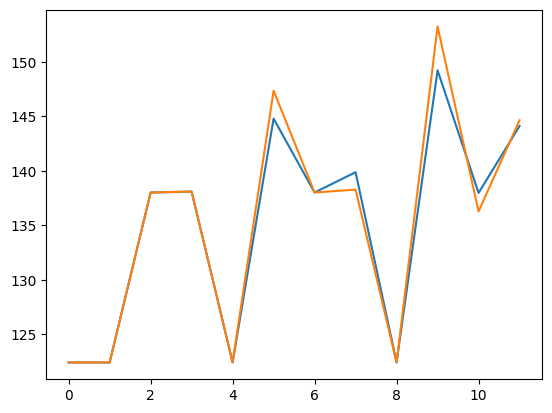

[[122.40009736]
 [122.40009807]
 [137.99773677]
 [138.0903635 ]
 [122.42364455]
 [147.34942027]
 [138.00212304]
 [138.26812726]
 [122.40364324]
 [153.24344463]
 [136.26979901]
 [144.63476639]]
[[10.        ]
 [10.12235107]
 [10.93571836]
 [ 9.99982689]
 [ 9.85256967]
 [ 9.72617042]
 [ 8.97648657]
 [ 9.99061183]
 [12.21560762]
 [ 8.36760337]
 [10.00015959]
 [10.0034226 ]]


In [59]:
import numpy as np
import matplotlib.pyplot as plt

z_grbs= z_grb.reshape(-1, 1)
arr_sum = np.sum([z_grbs, y2], axis=0)
pyplot.plot(y2, label="Тестовые данные")
plt.plot(arr_sum)
plt.show()
print(arr_sum)
print(z2)

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y2, arr_sum)
mse = mean_squared_error(y2, arr_sum)
rmse = mean_squared_error(y2, arr_sum, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
r2_score(y2, arr_sum)

mae: 0.8697560596095476
mse: 2.369561248120117
rmse: 1.5393379252523198


0.9735687642568276

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
z_grb = xgbr.predict(C2)
mse = mean_squared_error(d2, z_grb)
print('Accuracy',100- (np.mean(np.abs((d2 - z_grb) / d2)) * 100))
mae = mean_absolute_error(d2, z_grb)
print("RMSE: %.2f" % (mse**(1/2.0)))
print(mae)

Accuracy -11318596.066472722
RMSE: 7.91
2.83417847948211
